In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('craigslistVehiclesFull.csv')

In [123]:
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.477500,-96.704100,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,ford,fleetwood,excellent,6 cylinders,gas,107000.0,...,white,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.761200,-96.690700,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,excellent,6 cylinders,gas,107000.0,...,white,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.141500,-103.205200,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.284500,-95.593000,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,ford,2001 Grand Prix,excellent,6 cylinders,gas,217000.0,...,white,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.026100,-94.406400,19109.0,Kossuth,19.0,IA,Iowa,47.0
5,https://marshall.craigslist.org/ctd/d/2007-gmc...,marshall,9900,2007.0,gmc,yukon,good,8 cylinders,gas,169000.0,...,white,https://images.craigslist.org/00T0T_hFLz9hAHi0...,43.328149,-96.774445,46083.0,Lincoln,46.0,SD,South Dakota,38.0
6,https://marshall.craigslist.org/cto/d/2015-jee...,marshall,12500,2015.0,jeep,patriot high altitude,like new,4 cylinders,gas,39500.0,...,grey,https://images.craigslist.org/00404_RsUm4vwrGV...,43.548600,-96.633200,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
7,https://marshall.craigslist.org/ctd/d/2008-bmw...,marshall,3900,2008.0,bmw,3 series,excellent,6 cylinders,gas,0.0,...,white,https://images.craigslist.org/00202_8ciATrWst3...,41.622572,-87.632656,17031.0,Cook,17.0,IL,Illinois,48.0
8,https://soo.craigslist.ca/cto/d/ebike-red-zone...,soo,2700,2018.0,ford,Ebike,excellent,6 cylinders,electric,107000.0,...,red,https://images.craigslist.org/01111_7YfxuQ9Nxu...,46.509803,-84.257825,29021.0,Jefferson,6.0,CA,FAILED,53.0
9,https://soo.craigslist.ca/ctd/d/2003-ford-excu...,soo,12995,2003.0,ford,excursion,excellent,10 cylinders,gas,236000.0,...,blue,https://images.craigslist.org/00707_97tX51ryfc...,46.514191,-84.291307,29021.0,Jefferson,6.0,CA,FAILED,53.0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


In [5]:
df.shape

(1723065, 26)

In [6]:
df.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.716750e+06,1.159011e+06,1.723065e+06,1.723065e+06,1.664232e+06,1.664232e+06,1.663637e+06
mean,1.075540e+05,2.004841e+03,1.136387e+05,3.878195e+01,-9.371198e+01,2.843053e+04,2.834410e+01,5.378706e+01
std,1.004439e+07,1.208772e+01,1.368603e+05,5.976412e+00,1.696519e+01,1.605423e+04,1.603224e+01,7.799381e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.295000e+03,2.002000e+03,5.800000e+04,3.491900e+01,-1.058010e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,7.000000e+03,2.007000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.499900e+04,2.012000e+03,1.520000e+05,4.255459e+01,-8.102650e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


### menghitung persentase data yang hilang pada dataset

In [7]:
percentage = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
percentage

size            65.23
vin             64.90
type            40.80
condition       40.67
paint_color     40.37
cylinders       40.12
drive           38.41
odometer        32.74
manufacturer     7.92
make             4.05
weather          3.45
county_fips      3.41
county_name      3.41
state_fips       3.41
state_code       3.41
fuel             0.60
transmission     0.52
year             0.37
title_status     0.15
image_url        0.00
lat              0.00
state_name       0.00
long             0.00
price            0.00
city             0.00
url              0.00
dtype: float64

In [8]:
#Mengelist kolom numeric pada tabel
numerik= ['price','year','odometer','lat','long','county_fips','weather']

Untuk data yang hilang dengan persentasenya kurang dari 60% akan diisi median jika kolom tersebut numerik dan diisi modus jika
data tersebut kategorikal

In [9]:
#input median dan modus 
for i in df.columns:
    if i in numerik:
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].value_counts().index[0])


Untuk data yang persentasenya lebih dari 60 % akan dihapus yaitu variabel vin dan size

In [ ]:
df.drop(['size','vin'],axis=1,inplace=True)

### menghitung persentase data yang hilang pada dataset

In [10]:
percentage = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
percentage

weather         0.0
state_name      0.0
city            0.0
price           0.0
year            0.0
manufacturer    0.0
make            0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
image_url       0.0
lat             0.0
long            0.0
county_fips     0.0
county_name     0.0
state_fips      0.0
state_code      0.0
url             0.0
dtype: float64

In [12]:
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,ford,fleetwood,excellent,6 cylinders,gas,107000.0,...,white,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,excellent,6 cylinders,gas,107000.0,...,white,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,ford,2001 Grand Prix,excellent,6 cylinders,gas,217000.0,...,white,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


### Drop columns
Pada analisis kali ini county_fips,state_fips,url,image_url akan dihapus <br>
Kolom state_name juga akan dihapus karena arti dari entrynya sudah dijelaskan pada kolom state_code

In [13]:
df2=df.drop(['county_fips','state_fips','state_name'],axis=1)

In [14]:
df2.drop(['url','image_url'],inplace=True,axis=1)

In [15]:
df2.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,county_name,state_code,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,rwd,coupe,red,43.4775,-96.7041,Lincoln,SD,38.0
1,marshall,1515,1999.0,ford,fleetwood,excellent,6 cylinders,gas,107000.0,clean,other,4wd,sedan,white,44.7612,-96.6907,Deuel,SD,38.0
2,marshall,17550,2008.0,ford,f-150,excellent,6 cylinders,gas,107000.0,clean,automatic,4wd,sedan,white,44.1415,-103.2052,Meade,SD,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,fwd,sedan,grey,43.2845,-95.5930,Osceola,IA,47.0
4,marshall,400,2001.0,ford,2001 Grand Prix,excellent,6 cylinders,gas,217000.0,clean,automatic,4wd,sedan,white,43.0261,-94.4064,Kossuth,IA,47.0


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 19 columns):
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
type            object
paint_color     object
lat             float64
long            float64
county_name     object
state_code      object
weather         float64
dtypes: float64(5), int64(1), object(13)
memory usage: 249.8+ MB


# Analisis Numeric

In [17]:
#Membagi dataframe baru menjadi kategorikal dan numerik
numeric=['price','year','odometer','lat','long','weather']
df_kat=df2.drop(df[numeric],axis=1)
df_num=df2[numeric]


### Pada EDA ini akan difokuskan terhadap pengaruh variabel lain terhadap variabel 'price'
Akan dilihat distrubisi dari 'price'

In [18]:
df_num['price'].describe()

count    1.723065e+06
mean     1.075540e+05
std      1.004439e+07
min      1.000000e+00
25%      3.295000e+03
50%      7.000000e+03
75%      1.499900e+04
max      2.068627e+09
Name: price, dtype: float64

pada distribusi 'price' data terlihat sangat bervariasi jika dilihat dari  Q3 di 140000 dollar dan nilai maksimumnya di 2 milyar dollar

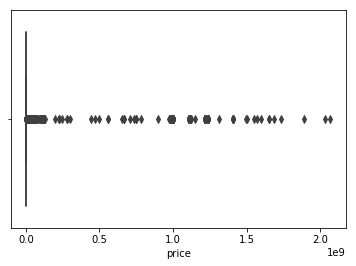

In [19]:
sns.boxplot(df_num['price'])

Jika dilihat dari boxplotnya juga memang ada harga 'price'  yang sangat tinggi membuat scale pada boxplot menjadi 'buruk'
sehingga tidak bisa dibaca <br>
Oleh karena itu akan difokuskan anilisis kali ini pada 'price' dengan harga yang dibawah nilai Q3 yaitu berkisar dibawah $140000

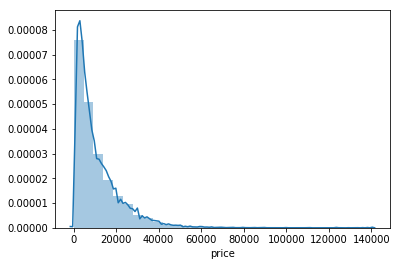

In [20]:
#dataset baru dengan harga price dibawah $140000
df_cheap=df2[df2.price<=140000]
sns.distplot(df_cheap['price'],kde=True,bins=30)

Untuk distribusi 'price' bisa dilihat bahwa mobil banyak yang hargganya berkisar di 0-30000 dollar <br>
dan distribusi data 'price' ialah skewness positif serta memang terdapat outlier di harga di atas $140000

In [22]:
#Membagi dataset df_cheap menjadi numeric dan kategorikal
numeric=['price','year','odometer','lat','long','weather']
df_cheap_kat=df_cheap.drop(df_cheap[numeric],axis=1) #variabel dataset untuk kategorikal
df_cheap_num=df_cheap[numeric] #variabel dataset untuk numeric

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A609482E10>,
      dtype=object)

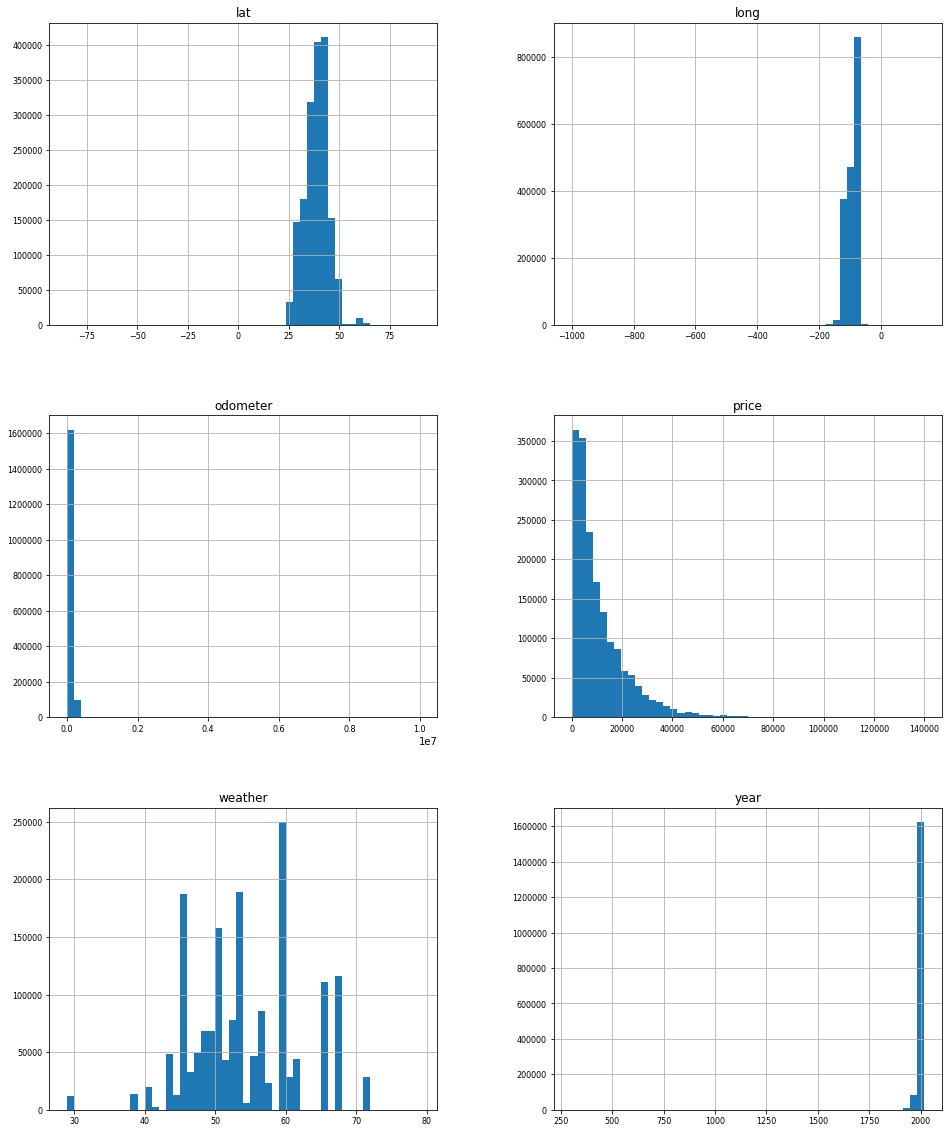

In [23]:
#Sekarang akan dilihat distribusi dari variabel lainnya
df_cheap_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Ternyata pada tabel 'odometer' dan 'year' terlihat bahwa terdapat beberapa data yang jauh jika dibandingan dengan lainnya <br>
lebih lanjut akan di dilihat pada statistika deskriptifnya

In [24]:
df_cheap_num.describe()

,price,year,odometer,lat,long,weather
count,1.721611e+06,1.721611e+06,1.721611e+06,1.721611e+06,1.721611e+06,1.721611e+06
mean,1.090219e+04,2.004853e+03,1.114781e+05,3.878272e+01,-9.371072e+01,5.375859e+01
std,1.128721e+04,1.205564e+01,1.122888e+05,5.975814e+00,1.696447e+01,7.665081e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,-8.481005e+01,-1.000000e+03,2.900000e+01
25%,3.295000e+03,2.002000e+03,8.436200e+04,3.491900e+01,-1.057839e+02,4.800000e+01
50%,7.000000e+03,2.007000e+03,1.070000e+05,3.941083e+01,-8.824070e+01,5.300000e+01
75%,1.499500e+04,2.012000e+03,1.299760e+05,4.255504e+01,-8.102568e+01,5.900000e+01
max,1.400000e+05,2.019000e+03,1.000000e+07,9.000000e+01,1.397061e+02,7.900000e+01


pada tabel 'year' ada tahun yang keluar di tahun 300an, hal ini tidak mungkin terjadi
pada model ini 'year' akan dipilih dimana
tahun keluarnya di atas 1900 <br>
Sedangkan untuk odometer data banyak berdistribusi rentang 80000-120000 miles

In [35]:
#Memilih dataframe baru untuk mobil tahun keluaran di atas 1900
df_cheap=df_cheap[df_cheap.year>1900]
df_cheap_num=df_cheap[numeric]
df_cheap_kat=df_cheap.drop(df_cheap_num[numeric],axis=1)


2007.0    114389
2008.0    103426
2006.0    101295
2015.0     94049
2005.0     92275
2004.0     83694
2012.0     81103
2011.0     80630
2013.0     80365
2014.0     77780
2010.0     71791
2003.0     71091
2016.0     66464
2009.0     64795
2002.0     59851
2017.0     58696
2001.0     50765
2000.0     43226
1999.0     36459
2018.0     26456
1998.0     26419
1997.0     23357
1995.0     17078
1996.0     16686
1994.0     13062
1993.0      9984
1992.0      8259
1991.0      7885
1989.0      7490
1990.0      7456
           ...  
1933.0       245
1926.0       215
1942.0       128
1925.0       109
1924.0        55
1922.0        49
1945.0        46
1944.0        32
1920.0        30
1943.0        28
1901.0        25
1918.0        22
1921.0        20
1917.0        18
1915.0        16
1919.0        14
1914.0        11
1916.0         9
1902.0         8
1903.0         7
1912.0         6
1910.0         6
1911.0         4
1913.0         3
1908.0         3
1909.0         2
1906.0         2
1905.0        

## Selanjutnya akan dilihat bagaimana pengaruh variabel odometer dan year  terhadap 'price'
### odometer vs price

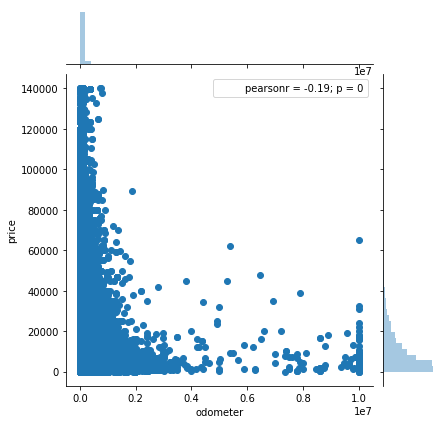

In [27]:
sns.jointplot(x='odometer',y='price',data=df_cheap_num)
plt.show()

Untuk odometer yang relatif tinggi lebih dari 50000 miles harga mobil tersebut lebih murah 
jika dibandingkan dengan yang odometernya rendah walaupun ada data yang odometernya diatas 50000 namun harganya juga tinggi 
yaitu diatas 50000 dollar
pada umumnya mobil memiliki odometer dari 0-30000 miles

### Year vs Price

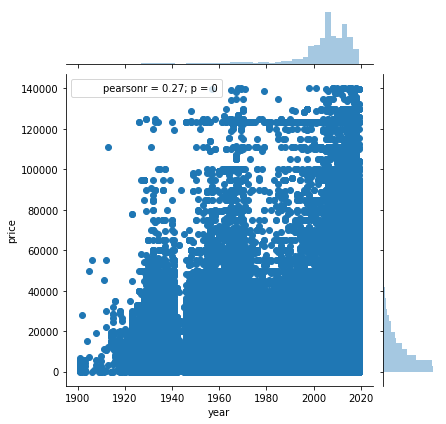

In [28]:

sns.jointplot(x='year',y='price',data=df_cheap_num)
plt.show()

Untuk 'year', pada umumnya mobil keluaran tahun yang lebih tua memiliki harga yang relatif murah jika dibandingan mobil keluaran baru <br>
Namun terdapat mobil keluaran tahun 1900an-1980an yang memiliki harga yang sangat tinggi bisa jadi merupakan mobil antik.

# create correlation


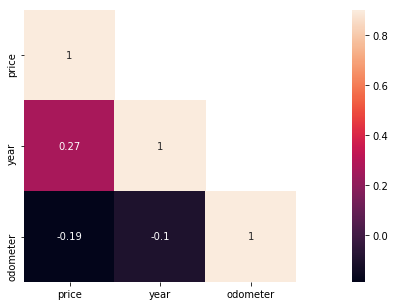

In [33]:

corr = df_cheap_num[['price','year','odometer']].corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,5)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Jika dilihat nilai korelasinnya 'year' vs price dan 'odometer' vs 'price' nilai korelasi kecil yaitu 0.27 dan -0.19 <br>
Hal ini bertolak belakang dengan pernyataan sebelumnya namun hal ini tidak masalah karena korelasi menyatakan hubungan linear antar variabel <br>
Bisa jadi bahwa antar variabel berhubungan namun tidak berhubungan linier

# Analisis Kategorikal 

In [36]:
df_cheap_kat.head()

,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code
0,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,coupe,red,Lincoln,SD
1,marshall,ford,fleetwood,excellent,6 cylinders,gas,clean,other,4wd,sedan,white,Deuel,SD
2,marshall,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Meade,SD
3,marshall,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,sedan,grey,Osceola,IA
4,marshall,ford,2001 Grand Prix,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Kossuth,IA


### Condition, Fuel Vs Price
Akan dilihat distribusi dari kondisi mobil terhadap harga dan akan dilihat jenis bahan bakarnya <br>
untuk setiap kondisi

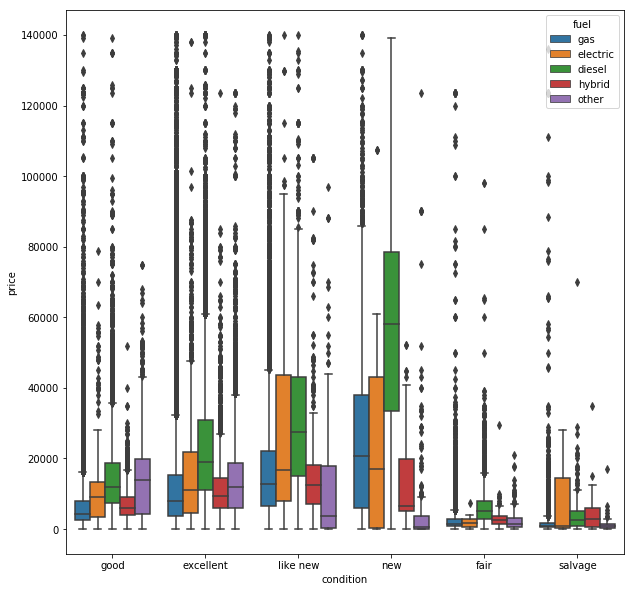

In [96]:
plt.figure(figsize=(10,10))
sns.boxplot(x='condition',y='price',data=df_cheap,hue='fuel')

Pada boxplot ini dibandingkan 'condition' mobil dengan 'price' mobil serta dilihat jenis dari bahan bakarnya 'fuel'.<br>
Secara distribusinya banyak mobil dengan kondisi 'new'  harganya lebih tinggi jika dibandingan dengan mobil bekas dengan
kondisi lainnya dan memang terlihat kondisi 'fair' secara disitribusi memiliki harga yang relatif rendah. Namun terdapat hal menarik yaitu ternyata terdapat banyak mobil dengan kondisi 'fair,salvage atau good'  yang memiliki harga yang tinggi yaitu di atas $100000. Jika dilihat dari distribusi 'fuel' , terdapat banyak mobil jenis diesel yang memiliki harga yang tinggi di rentangnya pada masing-masing jenis 'condition'.

### Manufacturer vs Price
Akan dilihat distribusi dari jenis manufacturer terhadap harga mobil. <br>
Pada analisis ini hanya dilihat 5 manufacturer yang memiliki mobil terbanyak. <br>
Untuk melihat distribusinya hanya harga dibawah $60000 saja dikarenakan agar hasil plotnya lebih jelas

In [74]:
df_cheap.manufacturer.value_counts()
top_5=df_cheap[(df_cheap.manufacturer=='ford') | (df_cheap.manufacturer=='chevrolet') | (df_cheap.manufacturer=='toyota')|
              (df_cheap.manufacturer=='honda') | (df_cheap.manufacturer=='nissan') ]

Masih cukup sulit untuk melihat distribusi data untuk setiap manufacturer apabila untuk harga kurang dari 140000 dollar sehingga akan dilihat untuk rentang harga kurang dari 60000 dollar

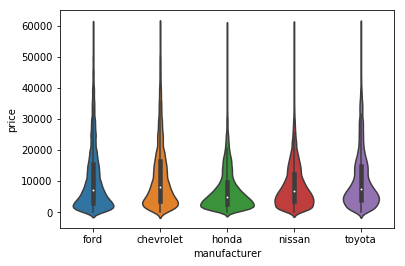

In [81]:
top_5=top_5[top_5['price']<60000]
sns.violinplot(x='manufacturer',y='price',data=top_5)

Terlihat dari hasil plot distribusi rentang harga mobil dari ke 5 manufacturer relatif sama <br>
paling banyak direntang $0-15000

Text(0,0.5,'Average Price')

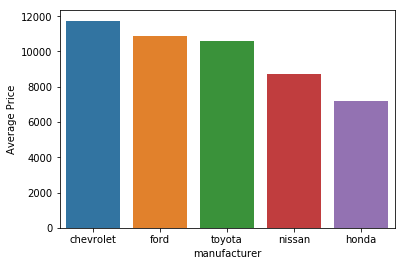

In [114]:
price=top_5.groupby('manufacturer').mean().sort_values(by='price',ascending=False).reset_index()
sns.barplot(x='manufacturer',y='price',data=price)
plt.ylabel('Average Price')

Urutan rata-rata harga mobil bekas dari yang tertinggi yaitu berasal dari manufacturer <br>
chevrolet,ford,toyota,nissan,honda untuk mobil dengan rentang harga $0-60000

### Cylinders vs Price
Akan dilihat rataan harga mobil berdasarkan jenis cylinders mobil tersebut

Text(0,0.5,'Average Price')

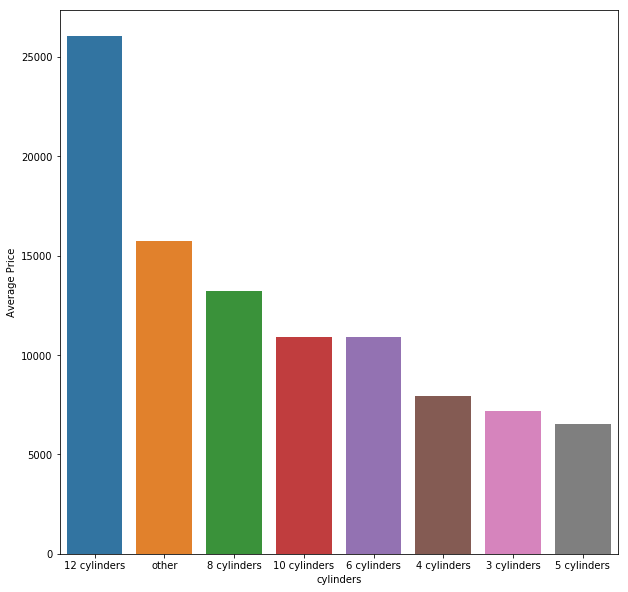

In [115]:
plt.figure(figsize=(10,10))
price=df_cheap.groupby('cylinders').mean().sort_values('price',ascending=False).reset_index()
sns.barplot(x='cylinders',y='price',data=price[price.price<=60000])
plt.ylabel('Average Price')


Berdasarkan rataan harga untuk setiap jenis cylinders : <br>
Diperoleh rataan harga dari yang tertinggi yaitu
12 cylinders, other , 8 cylinders , 10 cylinders, 6 cylinders, 4 cylinders, 3 cylinders , 5 cylinders <br>
dan rataan harga 10 cylinders mirip dengan rataan harga 6 cylinders

### State_code vs Number of used vehicles for sale
Akan dilihat jumlah mobil bekas yang dijual di setiap negaranya 

Text(0,0.5,'Number of used vehicles for sale')

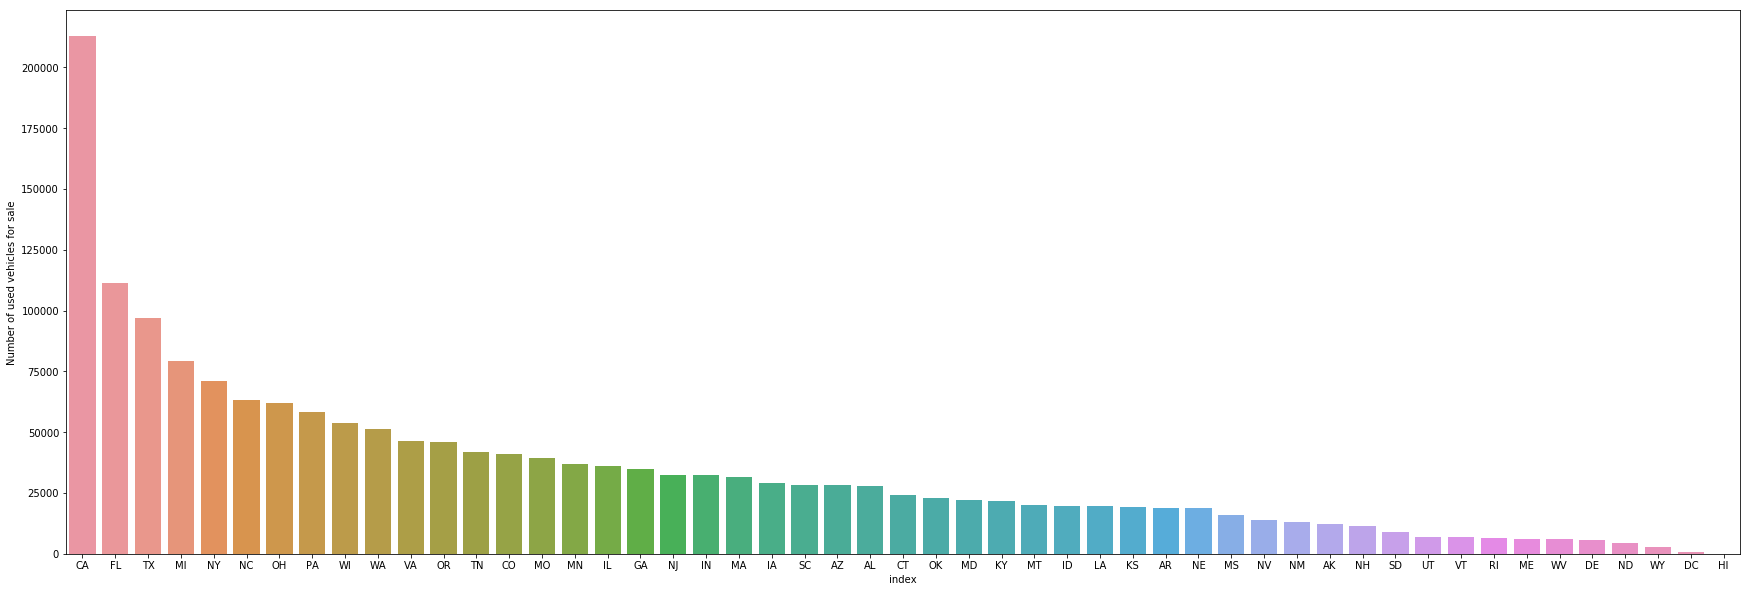

In [122]:
city=df_cheap.state_code.value_counts()
city=pd.DataFrame(city).reset_index()

plt.figure(figsize=(30,10))
sns.barplot(x='index',y='state_code',data=city)
plt.ylabel('Number of used vehicles for sale')

Negara dengan state_code CA memiliki jumlah mobil bekas yang dijual paling banyak <br>
kemudian diikuti dengan kode negara FL, TX dan seterusnya

### State Code Vs Average Price
Akan dilihat rataan harga mobil bekas untuk setiap negaranya

In [ ]:
plt.figure(figsize=(10,10))
city_price=df_cheap.groupby('state_code').mean().sort_values('price',ascending=False).reset_index()
sns.barplot(x='state_code',y='price',data=price[price.price<=60000])
plt.ylabel('Average Price')


Berikut merupakan hasil rataan harga mobil bekas untuk setiap negaranya diurutkan dari rataan harga tertinggi